In [98]:
import fastf1 as f1
import fastf1.plotting
from fastf1.core import Laps
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import numpy as np
import os


In [89]:
# f1.Cache.clear_cache("C:\Windows\Temp")

In [90]:
Year = 2022
GP = 4
Type = "Q"
session = f1.get_session(Year,GP, Type)

In [91]:
session.load()

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\krusa\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
C:\Users\krusa\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
C:\Users\krusa\AppData\Roa

In [92]:
drivers = pd.unique(session.laps["Driver"])
fastest_laps = [session.laps.pick_driver(drv).pick_fastest() for drv in drivers]
fastest_laps = Laps(fastest_laps).sort_values(by = "LapTime").reset_index(drop = True)
fastest_laps = fastest_laps[fastest_laps['Driver'].notna()]

C:\Users\krusa\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:2328: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


In [93]:
pole = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole['LapTime']
print(fastest_laps[['Driver','LapTime','LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     SAI 0 days 00:01:18.990000        0 days 00:00:00
1     TSU 0 days 00:01:20.474000 0 days 00:00:01.484000
2     GAS 0 days 00:01:20.732000 0 days 00:00:01.742000
3     RUS 0 days 00:01:20.757000 0 days 00:00:01.767000
4     MSC 0 days 00:01:20.916000 0 days 00:00:01.926000
5     HAM 0 days 00:01:21.138000 0 days 00:00:02.148000
6     ZHO 0 days 00:01:21.434000 0 days 00:00:02.444000
7     LAT 0 days 00:01:21.971000 0 days 00:00:02.981000
8     OCO 0 days 00:01:22.338000 0 days 00:00:03.348000
9     VER 0 days 00:01:27.999000 0 days 00:00:09.009000
10    STR 0 days 00:01:28.119000 0 days 00:00:09.129000
11    LEC 0 days 00:01:28.778000 0 days 00:00:09.788000
12    NOR 0 days 00:01:29.131000 0 days 00:00:10.141000
13    MAG 0 days 00:01:29.164000 0 days 00:00:10.174000
14    ALO 0 days 00:01:29.202000 0 days 00:00:10.212000
15    RIC 0 days 00:01:29.742000 0 days 00:00:10.752000
16    PER 0 days 00:01:29.808000 0 days 00:00:10

C:\Users\krusa\AppData\Local\Temp\ipykernel_12472\231503082.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)


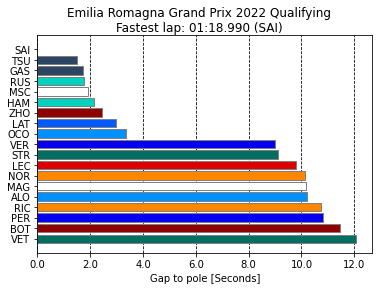

In [100]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],color= team_colors, edgecolor = 'grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
plt.xlabel("Gap to pole [Seconds]")
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
a = np.array(ax.get_xticks().tolist())/1000000000
ax.set_xticklabels(a)
lap_time_string = strftimedelta(pole['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n" 
             f"Fastest lap: {lap_time_string} ({pole['Driver']})");

newpath = f'{session.event.year}/{session.event["EventName"]}/Qualifying' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

plt.savefig(f'{session.event.year}/{session.event["EventName"]}/Qualifying/Results.jpeg')